<font size="+5">#05. Hiperparametros del Modelo</font>

<ul>
    <li>Resolver dudas → Pregunta en <img src="https://discord.com/assets/f9bb9c4af2b9c32a2c5ee0014661546d.png" style="height: 1em; vertical-align: middle;"> <a href="https://discord.gg/cmB3KGsqMy">Discord</a></li>
    <li>Tutoriales → <img src="https://openmoji.org/php/download_asset.php?type=emoji&emoji_hexcode=E044&emoji_variant=color" style="height: 1em; vertical-align: middle;"> <a href="https://www.youtube.com/channel/UCovCte2I3loteQE_kRsfQcw">YouTube</a></li>
    <li>Reservar Clases → <span style="color: orange">@</span> <a href="https://sotastica.com/reservar">sotastica</a></li>
</ul>

# Cargar Datos

> Copiamos y pegamos en una celda las siguientes líneas de código para cargar una tabla de datos que contiene información de personas que han solicitado tarjetas de crédito. La variable objetivo se sitúa en la columna `target` y nos cuenta si una persona ha sido apta para la tarjeta o no...

```python
import pandas as pd
pd.set_option("display.max_columns", None)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
df = pd.read_excel(io=url, header=1, index_col=0)
df.sample(10)
```

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
df = pd.read_excel(io=url, header=1, index_col=0)
df.sample(10)

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                            
19246     150000    2          2         1   37     -2     -1     -1     -2   
12020     180000    1          1         1   35      0      0      0      0   
29315      50000    1          2         2   26      0      0      0      0   
4308      500000    2          2         1   32      0      0      0      0   
446       220000    1          2         2   34      0      0      0      0   
1118       20000    1          1         2   24      1      2      0      0   
8187      360000    2          2         1   42      0      0      0      0   
17284      80000    2          1         1   41      0      0      0      0   
28977     150000    2          1         2   45     -2     -2     -2     -2   
9035      360000    2          2         2   30      1      2      2     -1   

       PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
ID                                                                           
19246     -2     -1          0       1771          0        730        626   
12020      0      0     170128     172258     138807     132806     135603   
29315      0      0      44781      46033      47289      47462      18204   
4308       0      0      37664       9689       9487      12641      14778   
446        0      0      37304      33304      29254      24875      20329   
1118       0     -2      18738      18016       7190       7190          0   
8187       0      0     118368     124934     131328     137605     140729   
17284      0      0      73863      74970      75285      73654      75642   
28977     -2     -2       1923        101          0          0          0   
9035      -1     -2       7102       6922       1861       1457       -129   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
ID                                                                             
19246       2718      1771         0       730       626      2718         0   
12020     137803      7187      5000      4749      5141      4916      4000   
29315      18322      2000      2000      2000      2000      3314      1000   
4308       10665      3000      1000      6000      4000      3000     23000   
446        15602      1600      1500      1100      1000       600       500   
1118           0        20      1500         0         0         0         0   
8187      146194     10000     10000     10000      5500      8000      6000   
17284      80984      3300      3300      3000      3500      9050         0   
28977        399       101         0         0         0       399         0   
9035       -2629      1893         0      1457      2500       326         0   

       default payment next month  
ID                                 
19246                           0  
12020                           0  
29315                           0  
4308                            0  
446                             0  
1118                            0  
8187                            0  
17284                           0  
28977                           0  
9035                            0

# Seleccionar Variables para el Modelo

> Comúnmente se conoce a esta temática de la Estadística como **Análisis Exploratorio de los Datos _(EDA)_**. El objetivo fundamental de este tópico es encontrar las variables que más se correlacionen y que den a entender un modelo de Árboles de Decisión, donde la variable objetivo debería ser categórica.
>
> No vamos a aentrar mucho en detalle, de momento. Así que tan solo seleccionaremos variables que nos parezcan interesantes. Estas variables deberemos distinguirlas según su papel en el modelo:
>
> 1.  Explicativas/Features/Input `X`
> 2.  Objetivo/Class/Target `y`

In [2]:
X = df.iloc[:, :-1]

In [3]:
y = df.iloc[:, -1]

In [4]:
X = pd.get_dummies(X, drop_first=True)

# Separar Datos en Train & Test

> En el capítulo anterior vimos que la técnica `Train Test Split` se debe usar siempre que queramos ver cómo de bueno es nuestro modelo. En cualquier proyecto que tenga como objetivo calcular una variable de interés debemos separar los datos que ya tenemos en `Entrenamiento` y `Testeo`.

In [5]:
from sklearn.model_selection import train_test_split

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
scaler = MinMaxScaler()

In [77]:
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [80]:
X.shape

(30000, 23)

In [81]:
X_train.shape

(21000, 23)

In [82]:
X_test.shape

(9000, 23)

# Árbol de Decisión con Hiperparámetros por Defecto

> El objetivo de este tópico es configurar los hiperparámetros para lograr una mayor precisión en los datos de `Testeo`. De momento, vamos a ver cómo se comporta el modelo con los hiperparámetros por defecto.

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
model = DecisionTreeClassifier(min_samples_leaf=20)

In [85]:
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20)

## Precisión

> Tanto en los datos de `Entrenamiento` como de `Testeo`.

In [86]:
model.score(X=X_train, y=y_train)

0.8425714285714285

In [14]:
model.score(X=X_test, y=y_test)

0.7982222222222223

## Visualización del Árbol

> Interpretamos las precisiones a través de la visualización.

In [15]:
from sklearn.tree import plot_tree

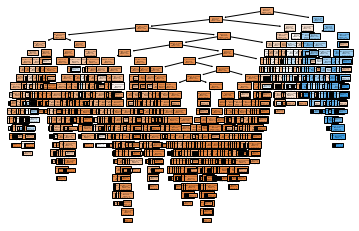

In [16]:
plot_tree(decision_tree=model, feature_names=X_train.columns, filled=True);

# Árbol de Decisión cambiando Algunos Hiperparámetros

> Usaremos las siguientes líneas de código para ver qué hiperparámetros podríamos configurar:

```python
model = DecisionTreeClassifier()
model.get_params()
```

> Debemos realizar al menos 5 configuraciones diferentes.

In [17]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 20,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

## 1a Configuración

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
model = DecisionTreeClassifier(min_samples_leaf=500)

In [20]:
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=500)

## Precisión

> Tanto en los datos de `Entrenamiento` como de `Testeo`.

In [21]:
model.score(X=X_train, y=y_train)

0.8194285714285714

In [22]:
model.score(X=X_test, y=y_test)

0.82

## Visualización del Árbol

> Interpretamos las precisiones a través de la visualización.

In [23]:
from sklearn.tree import plot_tree

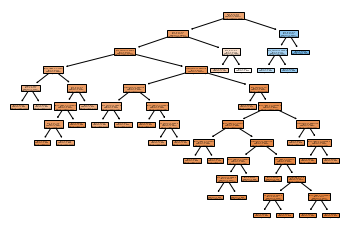

In [24]:
plot_tree(decision_tree=model, feature_names=X_train.columns, filled=True);

## 2a Configuración

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
model = DecisionTreeClassifier(min_samples_leaf=800)

In [25]:
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=800)

## Precisión

> Tanto en los datos de `Entrenamiento` como de `Testeo`.

In [26]:
model.score(X=X_train, y=y_train)

0.8194285714285714

In [27]:
model.score(X=X_test, y=y_test)

0.82

## Visualización del Árbol

> Interpretamos las precisiones a través de la visualización.

In [67]:
from sklearn.tree import plot_tree

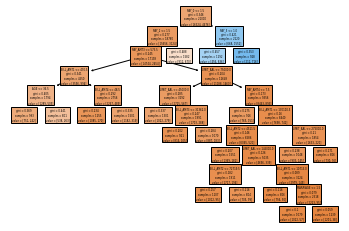

In [68]:
plot_tree(decision_tree=model, feature_names=X_train.columns, filled=True);

## 3a Configuración

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
model = DecisionTreeClassifier(min_samples_leaf=10)

In [30]:
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=10)

## Precisión

> Tanto en los datos de `Entrenamiento` como de `Testeo`.

In [31]:
model.score(X=X_train, y=y_train)

0.8645714285714285

In [32]:
model.score(X=X_test, y=y_test)

0.7745555555555556

## Visualización del Árbol

> Interpretamos las precisiones a través de la visualización.

In [54]:
from sklearn.tree import plot_tree

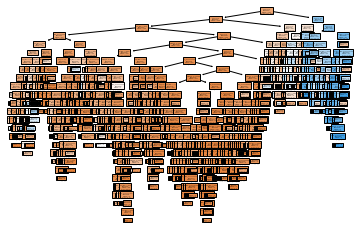

In [55]:
plot_tree(decision_tree=model, feature_names=X_train.columns, filled=True);

## 4a Configuración

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
model = DecisionTreeClassifier(min_samples_leaf=1000)

In [35]:
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=1000)

## Precisión

> Tanto en los datos de `Entrenamiento` como de `Testeo`.

In [36]:
model.score(X=X_train, y=y_train)

0.8194285714285714

In [37]:
model.score(X=X_test, y=y_test)

0.82

## Visualización del Árbol

> Interpretamos las precisiones a través de la visualización.

In [78]:
from sklearn.tree import plot_tree

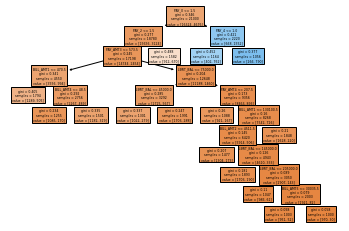

In [79]:
plot_tree(decision_tree=model, feature_names=X_train.columns, filled=True);

## 5a Configuración

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
model = DecisionTreeClassifier(min_samples_leaf=1200)

In [39]:
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=1200)

## Precisión

> Tanto en los datos de `Entrenamiento` como de `Testeo`.

In [40]:
model.score(X=X_train, y=y_train)

0.8194285714285714

In [41]:
model.score(X=X_test, y=y_test)

0.82

## Visualización del Árbol

> Interpretamos las precisiones a través de la visualización.

In [42]:
from sklearn.tree import plot_tree

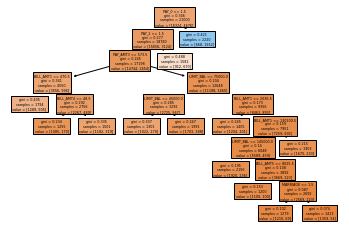

In [43]:
plot_tree(decision_tree=model, feature_names=X_train.columns, filled=True);

## 4a Configuración

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
model = DecisionTreeClassifier(max_depth=7)

In [29]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

## Precisión

> Tanto en los datos de `Entrenamiento` como de `Testeo`.

In [30]:
model.score(X=X_train, y=y_train)

0.8311428571428572

In [31]:
model.score(X=X_test, y=y_test)

0.8136666666666666

## Visualización del Árbol

> Interpretamos las precisiones a través de la visualización.

In [32]:
from sklearn.tree import plot_tree

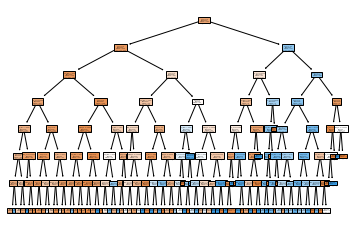

In [33]:
plot_tree(decision_tree=model, feature_names=X_train.columns, filled=True);

## 4a Configuración

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
model = DecisionTreeClassifier(max_depth=10)

In [36]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

## Precisión

> Tanto en los datos de `Entrenamiento` como de `Testeo`.

In [37]:
model.score(X=X_train, y=y_train)

0.8513809523809523

In [38]:
model.score(X=X_test, y=y_test)

0.8067777777777778

## Visualización del Árbol

> Interpretamos las precisiones a través de la visualización.

In [39]:
from sklearn.tree import plot_tree

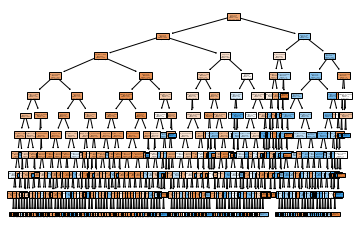

In [40]:
plot_tree(decision_tree=model, feature_names=X_train.columns, filled=True);

# Cross Validation para Seleccionar Mejores Hiperparámetros del Árbol de Decisión

> Obviamente, existe un método para probar diferentes configuraciones de hiperparámetros. Accedemos a él a través del objeto `GridSearchCV`.

In [44]:
from sklearn.model_selection import GridSearchCV

In [55]:
cv = GridSearchCV(estimator=model, param_grid={'min_samples_leaf': [10, 20, 40, 80, 160, 320]}, cv=5, verbose=2)

In [56]:
cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ................................min_samples_leaf=10; total time=   0.2s
[CV] END ................................min_samples_leaf=10; total time=   0.2s
[CV] END ................................min_samples_leaf=10; total time=   0.2s
[CV] END ................................min_samples_leaf=10; total time=   0.2s
[CV] END ................................min_samples_leaf=10; total time=   0.2s
[CV] END ................................min_samples_leaf=20; total time=   0.2s
[CV] END ................................min_samples_leaf=20; total time=   0.2s
[CV] END ................................min_samples_leaf=20; total time=   0.2s
[CV] END ................................min_samples_leaf=20; total time=   0.2s
[CV] END ................................min_samples_leaf=20; total time=   0.2s
[CV] END ................................min_samples_leaf=40; total time=   0.2s
[CV] END ................................min_samp

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(min_samples_leaf=160),
             param_grid={'min_samples_leaf': [10, 20, 40, 80, 160, 320]},
             verbose=2)

In [49]:
cv.best_params_

{'min_samples_leaf': 160}

In [50]:
model = DecisionTreeClassifier(min_samples_leaf=160)

In [52]:
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=160)

In [53]:
model.score(X_train, y_train)

0.8217619047619048

In [54]:
model.score(X_test, y_test)

0.8168888888888889

# Configurar Hiperparámetros de Otros Modelos

## Support Vector Machines

> Veamos cuál es la mejor configuración del objeto `SVC()` para predecir estos datos.

In [46]:
from sklearn.cluster import KMeans

In [48]:
model = KMeans()

In [49]:
model.fit()

TypeError: fit() missing 1 required positional argument: 'X'

In [43]:
from sklearn.svm import SVC


In [ ]:
from sklearn.svm import SV

In [53]:
a = list()

In [ ]:
model = SVC()

In [ ]:
model.fit()

In [55]:
class Persona():
    def __init__(self):
        self.peso = 8

In [56]:
juan = Persona()

In [58]:
juan.peso

8

In [59]:
model.__dict__

{'decision_function_shape': 'ovr',
 'break_ties': False,
 'kernel': 'rbf',
 'degree': 3,
 'gamma': 'scale',
 'coef0': 0.0,
 'tol': 0.001,
 'C': 1.0,
 'nu': 0.0,
 'epsilon': 0.0,
 'shrinking': True,
 'probability': False,
 'cache_size': 200,
 'class_weight': None,
 'verbose': False,
 'max_iter': -1,
 'random_state': None}

In [92]:
model = SVC(kernel='linear')

In [93]:
model.fit(X = X_train,y = y_train)

SVC(kernel='linear')

In [94]:
model.score(X = X_train, y=y_train)

0.8095714285714286

In [95]:
model.score(X = X_test, y = y_test)

0.8093333333333333

In [96]:
model = SVC(kernel='sigmoid')

In [97]:
model.fit(X = X_train,y = y_train)

SVC(kernel='sigmoid')

In [98]:
model.score(X = X_train, y=y_train)

0.6925238095238095

In [99]:
model.score(X = X_test, y = y_test)

0.6931111111111111

In [100]:
model = SVC(kernel='rbf')

In [101]:
model.fit(X = X_train,y = y_train)

SVC()

In [102]:
model.score(X = X_train, y=y_train)

0.8186666666666667

In [103]:
model.score(X = X_test, y = y_test)

0.8173333333333334

In [108]:
import seaborn as sns

In [110]:
import matplotlib.pyplot as plt

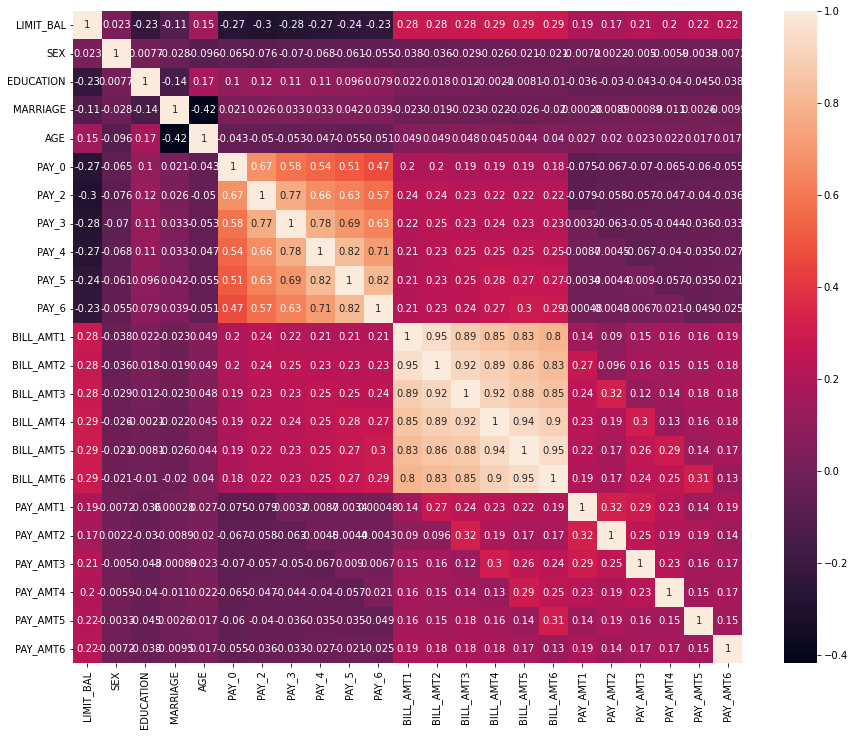

In [112]:
plt.figure(figsize=(15,12))
sns.heatmap(X_train.corr(), annot=True);

In [113]:
from sklearn.decomposition import PCA

In [126]:
pcacolumns = ['PC' + str(i+1) for i in range(pca.n_components_)]

In [128]:
pca = PCA()

In [130]:
dfpca = pd.DataFrame(pca.fit_transform(X_train), columns=pcacolumns)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

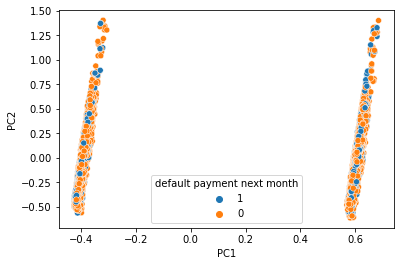

In [135]:
sns.scatterplot(x=dfpca['PC1'], y=dfpca['PC2'], hue=y_train.astype(str))

In [142]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

<AxesSubplot:xlabel='PAY_AMT6', ylabel='Count'>

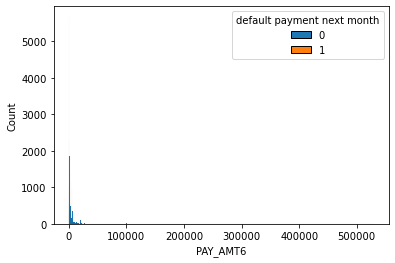

In [145]:
sns.histplot(x=df['PAY_AMT6'], hue=df['default payment next month'], alpha=1)

In [138]:
pca.explained_variance_ratio_.cumsum()

array([0.55232582, 0.69641864, 0.79044366, 0.84537579, 0.88340338,
       0.91635346, 0.93785575, 0.9558145 , 0.96831374, 0.9767127 ,
       0.98285882, 0.98703183, 0.99033947, 0.9928774 , 0.99524004,
       0.99668054, 0.99774996, 0.99854748, 0.99914582, 0.99949293,
       0.99974206, 0.99991129, 1.        ])

In [139]:
import plotly.express as px

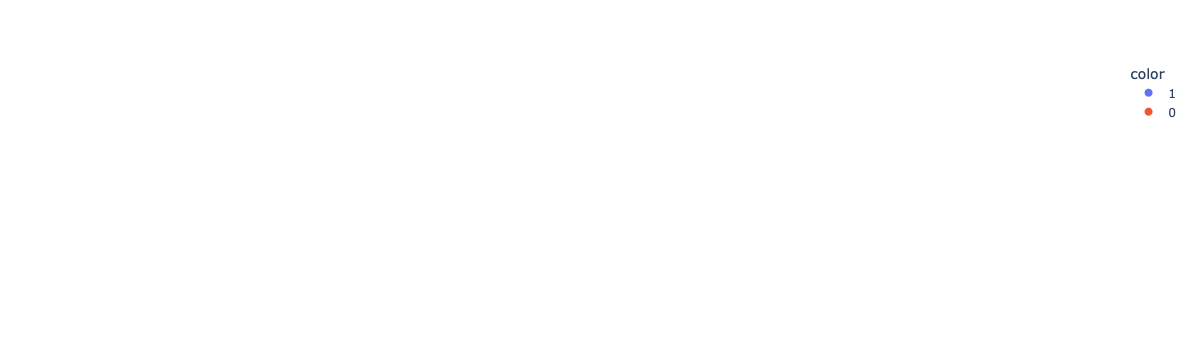

In [141]:
px.scatter_3d(x=dfpca['PC1'], y=dfpca['PC2'], z = dfpca['PC3'], color=y_train.astype(str))

## K Nearest Neighbours

> Veamos cuál es la mejor configuración del objeto `KNeighborsClassifier()` para predecir estos datos.

# Comparación Final de los Modelos con los Mejores Hiperparámetros

> Dentro de cada modelo hemos elegido su mejor configuración. Ahora tocaría preguntarnos cuál de los modelos es el mejor.